# Regression Multiple 


In [2]:
import numpy as np
import sklearn.datasets as datasets
import matplotlib.pyplot as plt

In [32]:
x,y = datasets.make_regression(n_samples=100,n_features=2,noise=1)

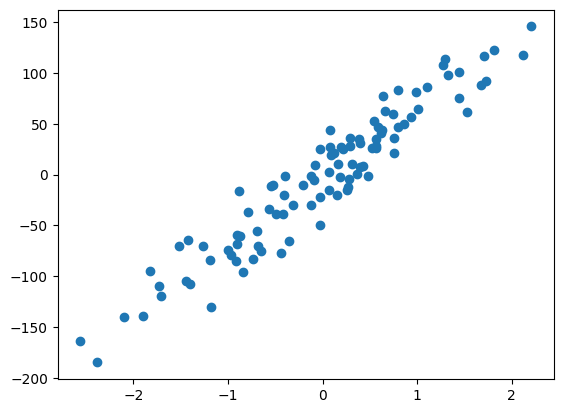

In [ ]:
plt.scatter(x[:,0],y)

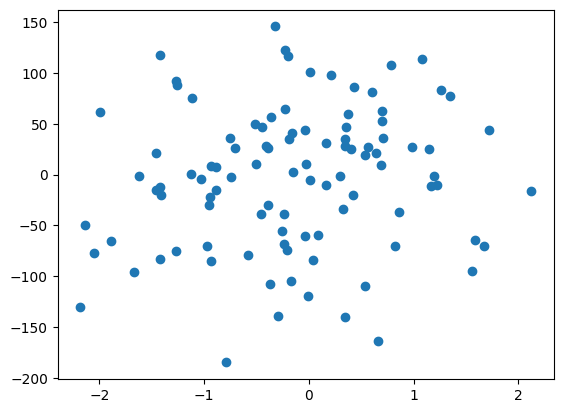

In [51]:
plt.scatter(x[:,1],y)

In [36]:
y = y.reshape(-1,1)
X = np.hstack((np.ones((x.shape[0],1)),x))
Theta = np.random.randn(3,1)
print(Theta)

[[ 0.32183142]
 [ 0.15079128]
 [-0.85463859]]


## Model de régression

In [40]:
def model(X,Theta):
    ret = X @ Theta
    return ret

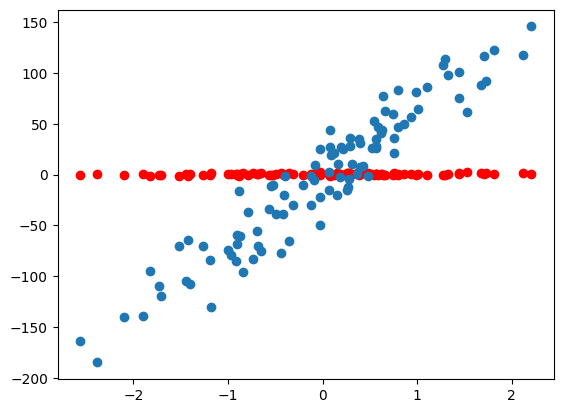

In [41]:
plt.scatter(x[:,0],model(X,Theta),c="red")
plt.scatter(x[:,0],y)

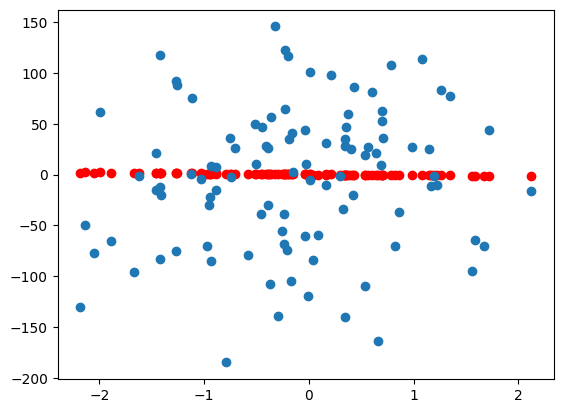

In [52]:
plt.scatter(x[:,1],model(X,Theta),c="red")
plt.scatter(x[:,1],y)

## Fonction coût(MSE):

$$
J(\theta) = \frac{1}{2m} \left( \mathbf{y} - \mathbf{X} \boldsymbol{\theta} \right)^T \left( \mathbf{y} - \mathbf{X} \boldsymbol{\theta} \right)
$$



In [42]:
def cost(x,y,Theta):
    m = len(y)
    result = 1/(2*m) * np.sum((model(X,Theta) - y) ** 2)
    return result
print(f" cout:",cost(x,y,Theta))

 cout: 2411.812475098048


## Descend de gradients

- Gradient de la fonction coût:

$$
\mathbf{\nabla_{\theta}} J(\theta) = \frac{1}{m} \mathbf{X}^T (\mathbf{X} \boldsymbol{\theta} - \mathbf{y})
$$

- Mise à jour des paramètres avec la descente de gradient :

$$
\boldsymbol{\theta} := \boldsymbol{\theta} - \alpha \cdot \mathbf{\nabla_{\theta}} J(\theta)
$$






In [43]:
def gradient(X,y,Theta):
    m = len(y)
    result = 1/m * X.T.dot(model(X,Theta) - y)
    return result

In [44]:
def gradient_descent(X,y,Theta,learning_rate,n):
    cost_historique = np.zeros(n)
    for i in range(0,n):
        Theta = Theta - (learning_rate * gradient(X,y,Theta))
        cost_historique[i] = cost(x,y,Theta)
    return Theta, cost_historique

In [45]:
Theta_final, cost_historique = gradient_descent(X,y,Theta,0.001,4000)
print(Theta_final)

[[-0.56783768]
 [68.04231515]
 [20.26946644]]


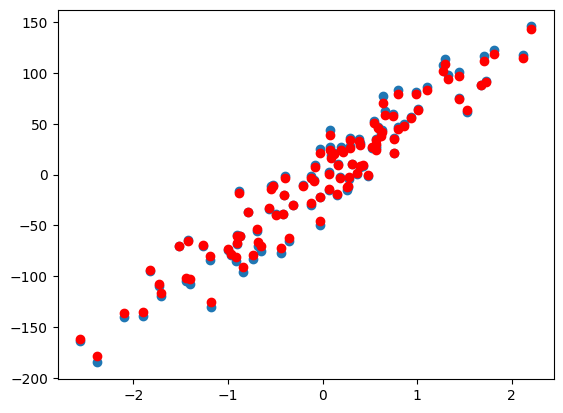

In [47]:
y_final = model(X,Theta_final)
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_final,c="red")

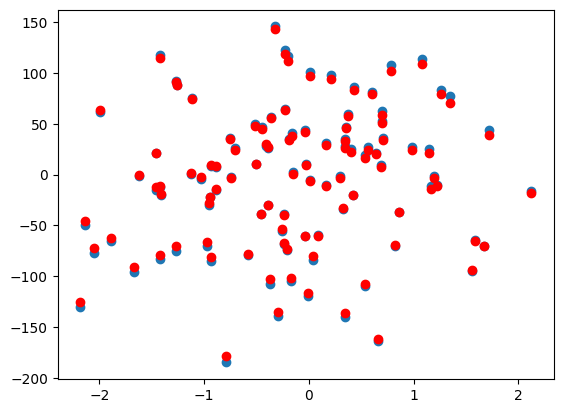

In [53]:
plt.scatter(x[:,1],y)
plt.scatter(x[:,1],y_final,c="red")

## Performance du model

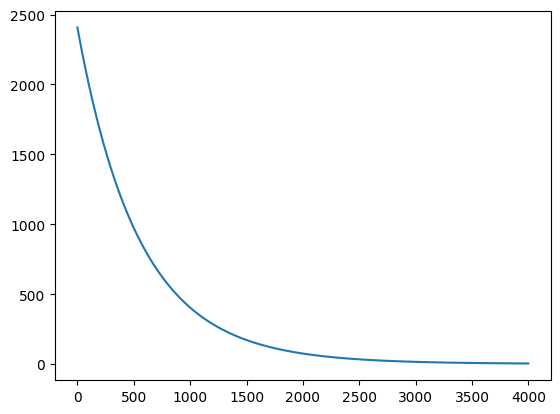

In [48]:
plt.plot(range(4000),cost_historique)

## Coefficient de Determination

$$R² = 1 - \frac{\sum(y - f(x))^2}{\sum(y - \bar{y})^2}$$

In [49]:
def coef_determination(y,y_final):
    u = np.sum((y - y_final) ** 2)
    v = np.sum((y - y.mean()) ** 2)
    return 1 - (u / v)

In [50]:
print(coef_determination(y,y_final))

0.9985417906639777
